In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
import optuna
import xgboost as xgb
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier, StackingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score, adjusted_rand_score, jaccard_score, classification_report
%matplotlib inline

In [15]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("TrainingInputFile.csv")

In [3]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
ProfileReport(df).to_file("Training_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

Text(0, 0.5, 'WCSS')

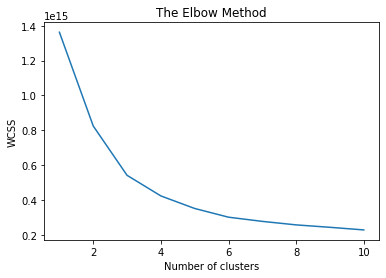

In [6]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [7]:
number_of_clusters = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing').knee

In [8]:
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
X["Cluster"] = kmeans.fit_predict(X)
X["Label"] = y

In [9]:
list_of_clusters = X["Cluster"].unique()
sc = StandardScaler()

In [32]:
def get_best_params_for_xgboost(train_x,train_y):
    param_grid_xgboost = {
        "n_estimators": [50,100, 130],
        "max_depth": range(3, 11, 1),
        "random_state":[0,50,100]
    }
    grid= GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'),param_grid_xgboost,cv=2,n_jobs=-1)
    grid.fit(train_x, train_y)
    random_state = grid.best_params_['random_state']
    max_depth = grid.best_params_['max_depth']
    n_estimators = grid.best_params_['n_estimators']
    xgbc = xgb.XGBClassifier(random_state=random_state, max_depth=max_depth,n_estimators= n_estimators, n_jobs=-1 )
    xgbc.fit(train_x, train_y)
    return xgbc

In [17]:
def get_best_params_for_naive_bayes(train_x,train_y):
    param_grid = {"var_smoothing": [1e-9,0.1, 0.001, 0.5,0.05,0.01,1e-8,1e-7,1e-6,1e-10,1e-11]}
    grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=3, n_jobs= -1)
    grid.fit(train_x, train_y)
    var_smoothing = grid.best_params_['var_smoothing']
    gnb = GaussianNB(var_smoothing=var_smoothing)
    gnb.fit(train_x, train_y)
    return gnb

In [18]:
def get_best_params_for_random_forest(train_x,train_y):
    param_grid = {
        "n_estimators": [10, 50, 100, 130],
        "criterion": ['gini', 'entropy'],
        "max_depth": range(2, 4, 1),
        "max_features": ['auto', 'log2']
    }
    grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs= -1)
    grid.fit(train_x, train_y)
    criterion = grid.best_params_['criterion']
    max_depth = grid.best_params_['max_depth']
    max_features = grid.best_params_['max_features']
    n_estimators = grid.best_params_['n_estimators']
    clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, max_features=max_features)
    clf.fit(train_x, train_y)
    return clf

In [30]:
def get_best_model(train_x,train_y,test_x,test_y):
    xgboost_model= get_best_params_for_xgboost(train_x,train_y)
    prediction_xgboost = xgboost_model.predict(test_x)
    if len(test_y.unique()) == 1: 
        xgboost_score = accuracy_score(test_y, prediction_xgboost)
    else:
        xgboost_score = roc_auc_score(test_y, prediction_xgboost)
    naive_bayes=get_best_params_for_naive_bayes(train_x, train_y)
    prediction_naive_bayes=naive_bayes.predict(test_x) 
    if len(test_y.unique()) == 1:
        naive_bayes_score = accuracy_score(test_y, prediction_naive_bayes)
    else:
        naive_bayes_score = roc_auc_score(test_y, prediction_naive_bayes) 
    random_forest = get_best_params_for_random_forest(train_x, train_y)
    prediction_random_forest = random_forest.predict(test_x)
    if len(test_y.unique()) == 1:
        random_forest_score = accuracy_score(test_y, prediction_random_forest)
    else:
        random_forest_score = roc_auc_score(test_y, prediction_random_forest)
    if naive_bayes_score <  xgboost_score and xgboost_score > random_forest_score:
        return 'XGBoost', xgboost_model
    elif naive_bayes_score >  xgboost_score and naive_bayes_score > random_forest_score:
        return 'NaiveBayes', naive_bayes
    else:
        return "RandomForest", random_forest

In [35]:
list_of_models = []
for i in list_of_clusters:
    cluster_data=X[X['Cluster']==i] 
    cluster_features=cluster_data.drop(['Label','Cluster'],axis=1)
    cluster_label= cluster_data['Label']
    column_names = cluster_features.columns
    cluster_features = pd.DataFrame(data=sc.fit_transform(cluster_features), columns=column_names)
    X_train, X_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size=1 / 3, random_state=0)
    best_model_name, best_model = get_best_model(X_train, y_train, X_test, y_test)
    print(f"Cluster number {i+1}: {best_model}")
    list_of_models.append(best_model)

Cluster number 1: GaussianNB(var_smoothing=0.5)
Cluster number 2: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)
Cluster number 3: GaussianNB(var_smoothing=0.5)


In [36]:
pred_df = pd.read_csv("TestingInputFile.csv")

In [37]:
pred_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,50000,2,2,2,23,-1,-1,-1,0,-1,...,780,390,390,500,0,780,0,390,500,18300
1998,120000,1,2,2,25,2,2,0,0,0,...,111700,83858,86434,88802,0,5000,3158,3934,3802,2000
1999,100000,1,2,1,29,0,0,0,0,-1,...,67782,-2618,95748,101299,3320,5000,0,100000,7186,0
2000,200000,2,2,1,28,0,0,0,0,0,...,8441,97041,103541,3632,5000,2000,89000,6500,91,1504


In [39]:
ProfileReport(pred_df).to_file("Testing_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
pred_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,...,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,167087.912088,1.590410,1.776224,1.603896,34.941059,-0.002997,-0.155345,-0.160839,-0.279720,-0.280220,...,44981.964036,40741.320679,39071.871129,38056.488012,5373.702298,5049.942557,4130.655345,4669.703297,5332.681818,5096.946054
std,130519.897111,0.491881,0.749395,0.532262,9.219762,1.171881,1.227433,1.259489,1.181939,1.167997,...,69510.626166,68166.981508,63062.664898,63040.632738,12177.440709,15622.381616,10340.005746,13266.465465,16807.871941,23652.198358
min,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-9850.000000,-3684.000000,-28335.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1947.000000,1438.000000,1254.000000,869.000000,1000.000000,390.000000,229.250000,150.000000,196.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19298.000000,17743.000000,17591.500000,15874.000000,2160.000000,1700.000000,1200.000000,1380.000000,1306.000000,1261.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54477.000000,48800.000000,46361.750000,46557.000000,5085.000000,4500.000000,3715.000000,4000.000000,3745.000000,3800.000000
max,700000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,499936.000000,628699.000000,484612.000000,473944.000000,199646.000000,285138.000000,133657.000000,188840.000000,195599.000000,528666.000000


In [43]:
column_names = pred_df.columns
sc = StandardScaler()
X = pd.DataFrame(data = sc.fit_transform(pred_df), columns=column_names)

In [48]:
clusters=kmeans.predict(X)
X['Clusters']=clusters
clusters=X['Clusters'].unique()

In [53]:
predictions=[]
for i in clusters:
    cluster_data= X[X['Clusters']==i]
    cluster_data = cluster_data.drop(['Clusters'],axis=1)
    model = list_of_models[i]
    result=list(model.predict(cluster_data))
    final= pd.DataFrame(list(zip(result)),columns=['Predictions'])
    final.to_csv("Predictions.csv",header=True,mode='a+')